# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)


Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

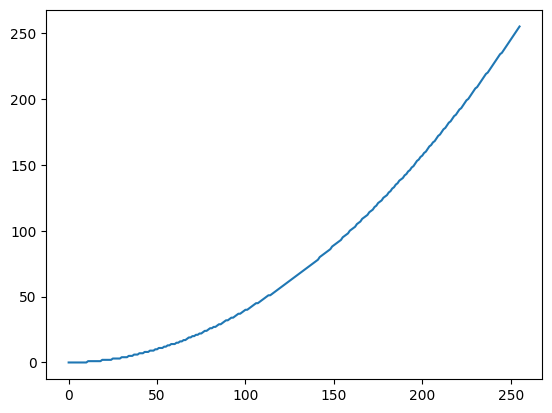

In [3]:
import lut

plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [4]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

In [5]:
img = cv2.imread('lena.bmp')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [6]:
cv2.LUT(img, lut.kwadratowa)   

array([[73, 73, 73, ..., 66, 51, 51],
       [73, 73, 73, ..., 66, 51, 51],
       [71, 70, 70, ..., 32, 21, 21],
       ...,
       [ 3,  3,  3, ..., 13, 14, 14],
       [ 3,  3,  3, ..., 16, 17, 17],
       [73, 73,  3, ..., 20, 21, 21]], dtype=int32)

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [7]:
def LUT(img, transformation_method):
    modified_image = cv2.LUT(img, transformation_method)
    _, (ax1, ax2, ax3) = plt.subplots(1,3)
    ax1.set_title('method graph')
    ax2.set_title('original image')
    ax3.set_title('modified image')
    ax1.plot(transformation_method)
    ax2.imshow(img)
    ax3.imshow(modified_image)
    plt.gray()
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

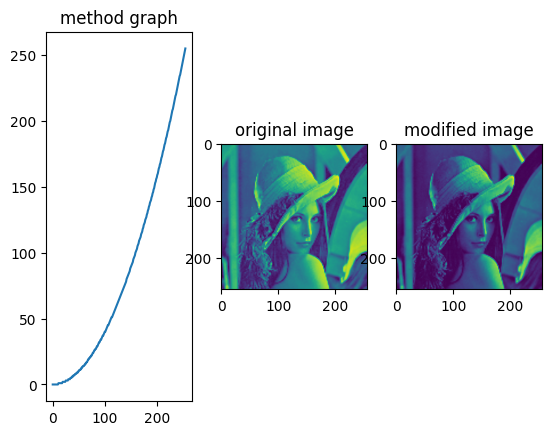

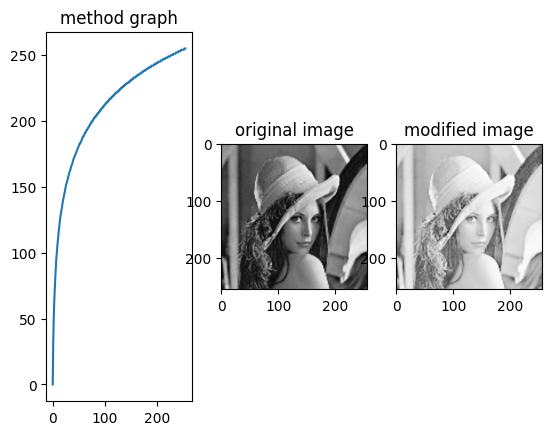

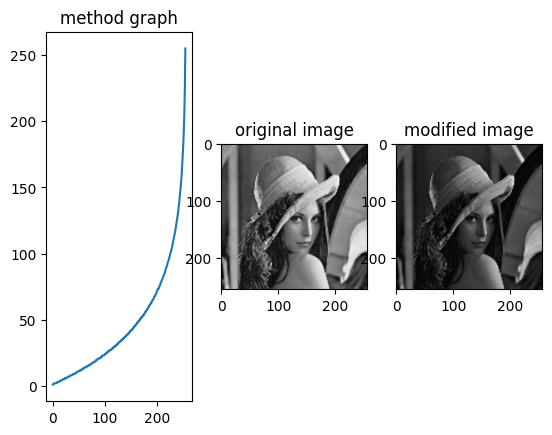

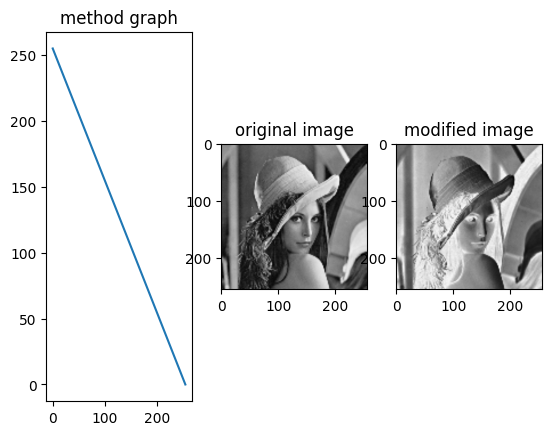

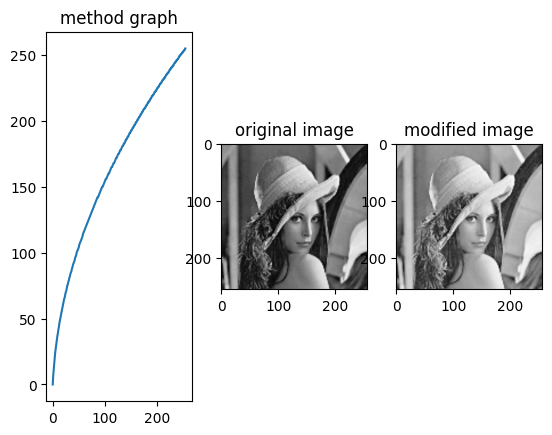

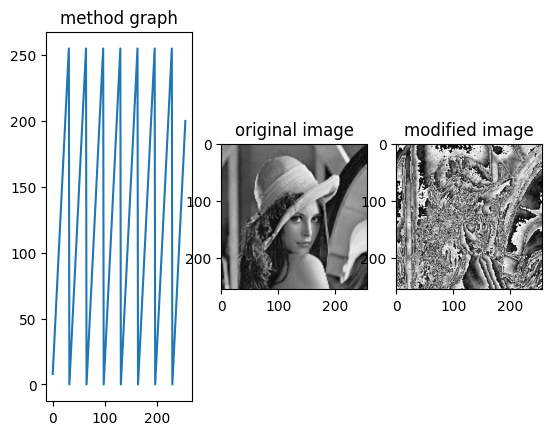

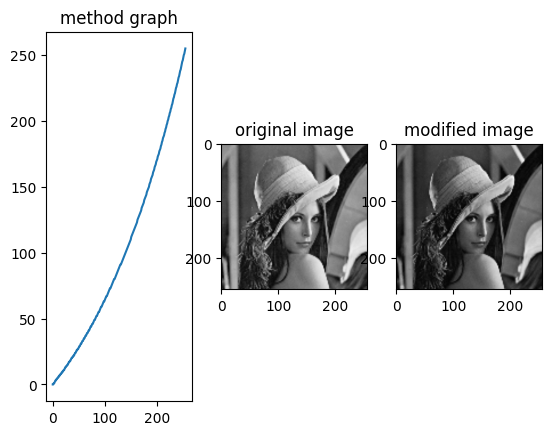

In [8]:
transformations = [lut.kwadratowa, lut.log, lut.odwlog, lut.odwrotna, lut.pierwiastkowa, lut.pila, lut.wykladnicza]

for transformation in transformations:
    LUT(img, transformation)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

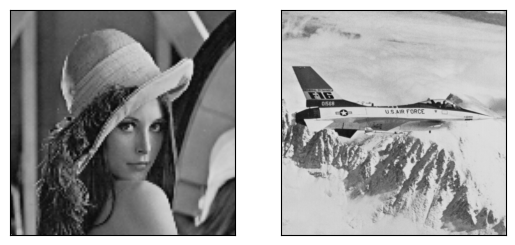

In [9]:
lena = cv2.imread("lena.bmp")
jet = cv2.imread("jet.bmp")
_, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(lena)
ax2.imshow(jet)

ax1.set_xticks([]), ax1.set_yticks([])
ax2.set_xticks([]), ax2.set_yticks([])

plt.gray()
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

In [10]:
def show_image(image):
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.gray
    plt.show()

In [11]:
addition_result = cv2.add(lena, jet)
show_image(addition_result)

error: OpenCV(4.10.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:661: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

In [ ]:
addition_result = cv2.add(jet.astype('uint16'), lena.astype('uint16'))
addition_result //= 2
addition_result = addition_result.astype('uint8')
show_image(addition_result)

In [13]:
def show_two_images(img1, img2):
    _, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_xticks([]), ax1.set_yticks([])
    ax2.set_xticks([]), ax2.set_yticks([])
    ax1.imshow(img1)
    ax2.imshow(img2)
    plt.gray()
    plt.show() 

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

In [ ]:
proportions = [(1/x, 1-1/x) for x in range(1, 10, 2)]
for x in proportions:
    percent_1 = x[0]
    percent_2 = x[1]
    result = cv2.addWeighted(jet, percent_1, lena, percent_2, 0)
    show_image(result)


### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

In [ ]:
show_image(cv2.subtract(lena, jet))

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

In [ ]:
lena.astype('int16')
jet.astype('int16')
np.abs(lena.astype('int16') - jet.astype('int16'))
show_image(np.abs(lena.astype('int16') - jet.astype('int16')))

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

In [ ]:
show_image(cv2.multiply(lena, jet))

In [18]:
def normalise(result):
    min_val = np.min(result)
    max_val = np.max(result)
    scaled_result = 255 * (result - min_val) / (max_val - min_val)
    return scaled_result

In [ ]:
img1 = (cv2.multiply(lena.astype('float64'), jet.astype('float64')) // 255).astype('uint8')
img2 = cv2.multiply(lena.astype('float64'), jet.astype('float64')).astype('uint8') 
img3 = np.sqrt(cv2.multiply(lena.astype('float64'), jet.astype('float64'))).astype('uint8')
show_two_images(img1, normalise(img2))
show_image(img3)


Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [20]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)


In [ ]:
maska = cv2.imread('kolo.bmp')
show_image(cv2.multiply(lena, maska.astype('bool').astype('uint8')))

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

In [ ]:
show_two_images(cv2.bitwise_not(lena), cv2.LUT(lena, lut.odwrotna))

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [23]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

In [ ]:
kwadrat = cv2.imread('kwadrat.bmp')

not_result = cv2.bitwise_not(kwadrat)
and_result = cv2.bitwise_and(maska, kwadrat)
or_result = cv2.bitwise_or(maska, kwadrat)
xor_result = cv2.bitwise_xor(maska, kwadrat)

show_image(not_result)
show_image(and_result)
show_image(or_result)
show_image(xor_result)
